**Table of contents**<a id='toc0_'></a>    
- [Data loading](#toc1_)    
- [Data vizualization](#toc2_)    
  - [AAPL Closing Price And Traded Volume Over Time](#toc2_1_)    
  - [AAPL Candlestick Chart (High, Low, Open, Close)](#toc2_2_)    
- [Statistical Analysis](#toc3_)    
  - [Summary statistics](#toc3_1_)    
  - [AAPL Closing Price With 50-Day And 200-Day Moving Averages](#toc3_2_)    
- [Hypothesis Testing](#toc4_)    
  - [Average closing prices across different years](#toc4_1_)    
  - [Distribution Of AAPL Daily Returns](#toc4_2_)    
- [Conclusions](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data loading](#toc0_)

In [1]:
import pandas as pd

aapl_data = pd.read_csv(r'https://raw.githubusercontent.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/refs/heads/main/AAPL%2C%201D%2001012007-12072023.csv')


aapl_data_info = aapl_data.info()
aapl_data_head = aapl_data.head()

null_values = aapl_data.isnull().sum()

aapl_data_info, aapl_data_head, null_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


(None,
          volume    vwap    open   close    high     low        time  \
 0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
 1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
 2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143  1167973200   
 3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457  1168232400   
 4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411  1168318800   
 
    transactions  
 0        189737  
 1        136333  
 2        141050  
 3        130547  
 4        569578  ,
 volume          0
 vwap            0
 open            0
 close           0
 high            0
 low             0
 time            0
 transactions    0
 dtype: int64)

# <a id='toc2_'></a>[Data vizualization](#toc0_)

## <a id='toc2_1_'></a>[AAPL Closing Price And Traded Volume Over Time](#toc0_)

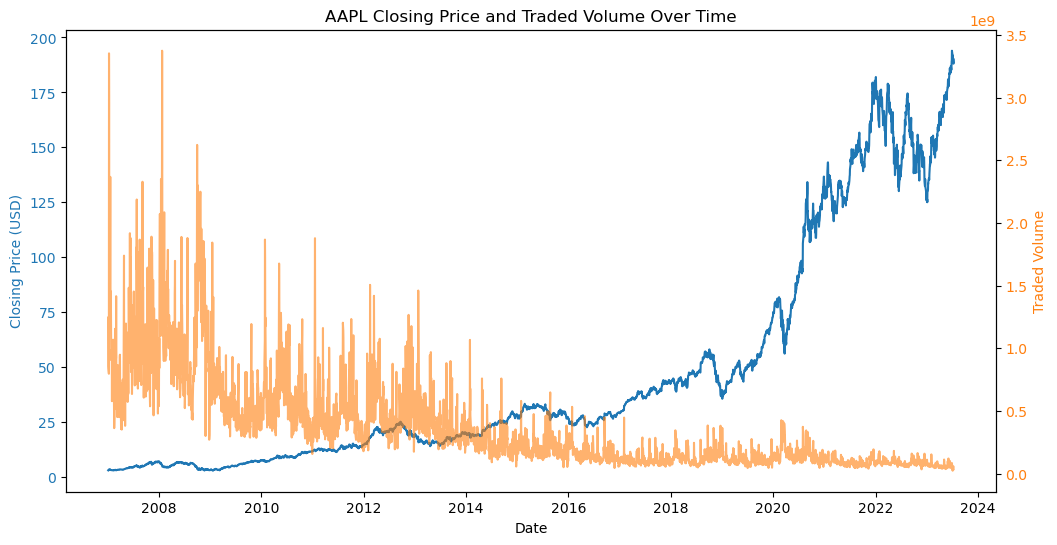

In [3]:
# Convert the 'time' column from UNIX timestamp to datetime format
aapl_data['time'] = pd.to_datetime(aapl_data['time'], unit='s')

# Plot closing prices and traded volume over time
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Closing Price
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (USD)', color='tab:blue')
ax1.plot(aapl_data['time'], aapl_data['close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for volume
ax2 = ax1.twinx()
ax2.set_ylabel('Traded Volume', color='tab:orange')
ax2.plot(aapl_data['time'], aapl_data['volume'], color='tab:orange', label='Volume', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('AAPL Closing Price and Traded Volume Over Time')
plt.show()


## <a id='toc2_2_'></a>[AAPL Candlestick Chart (High, Low, Open, Close)](#toc0_)

C:\Users\d1411\AppData\Local\Temp\ipykernel_6832\2052469045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_ohlc['time'] = aapl_ohlc['time'].map(mdates.date2num)


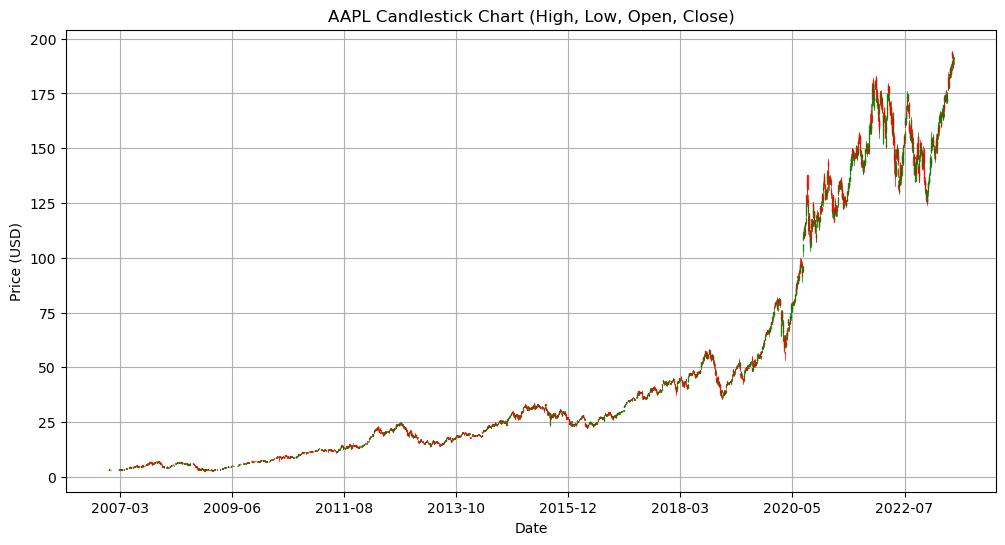

In [4]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc

# Prepare data for the candlestick chart (OHLC data)
aapl_ohlc = aapl_data[['time', 'open', 'high', 'low', 'close']]
aapl_ohlc['time'] = aapl_ohlc['time'].map(mdates.date2num)

# Set up the plot for the candlestick chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the candlestick chart
candlestick_ohlc(ax, aapl_ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Formatting date on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.grid(True)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
plt.title('AAPL Candlestick Chart (High, Low, Open, Close)')

plt.show()


# <a id='toc3_'></a>[Statistical Analysis](#toc0_)

## <a id='toc3_1_'></a>[Summary statistics](#toc0_)

In [5]:
# Compute summary statistics for key columns
summary_stats = aapl_data[['close', 'volume', 'transactions']].describe().loc[['mean', '50%', 'std']]

# Rename '50%' to 'median'
summary_stats.rename(index={'50%': 'median'}, inplace=True)

summary_stats


,close,volume,transactions
mean,46.396058,3.662925e+08,270931.774465
median,25.825000,2.136463e+08,178246.000000
std,50.293482,3.724793e+08,251085.854744


## <a id='toc3_2_'></a>[AAPL Closing Price With 50-Day And 200-Day Moving Averages](#toc0_)

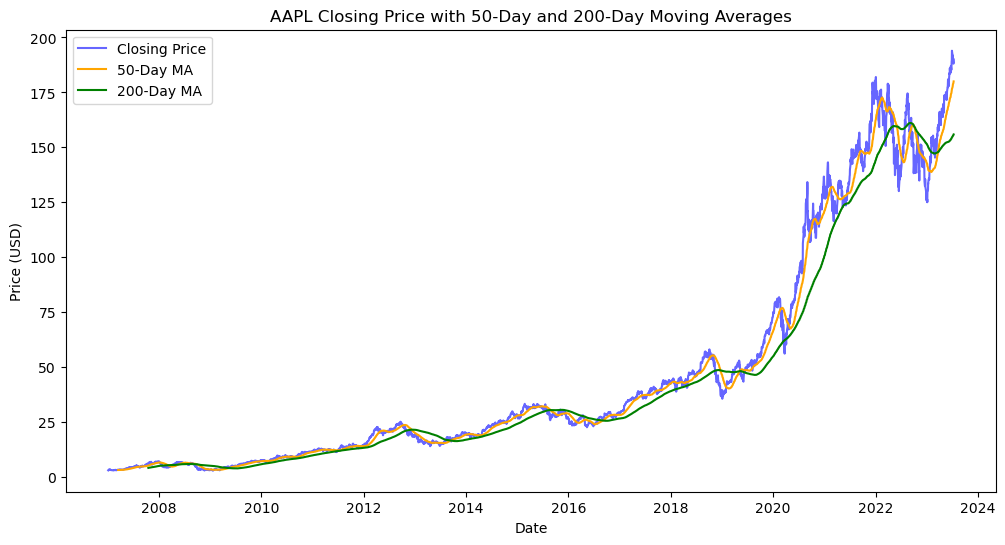

In [6]:
# Calculate 50-day and 200-day moving averages
aapl_data['MA_50'] = aapl_data['close'].rolling(window=50).mean()
aapl_data['MA_200'] = aapl_data['close'].rolling(window=200).mean()

# Plot the closing prices along with the moving averages
plt.figure(figsize=(12, 6))

# Plot the closing price
plt.plot(aapl_data['time'], aapl_data['close'], label='Closing Price', color='blue', alpha=0.6)

# Plot the 50-day moving average
plt.plot(aapl_data['time'], aapl_data['MA_50'], label='50-Day MA', color='orange')

# Plot the 200-day moving average
plt.plot(aapl_data['time'], aapl_data['MA_200'], label='200-Day MA', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('AAPL Closing Price with 50-Day and 200-Day Moving Averages')
plt.legend()

plt.show()


# <a id='toc4_'></a>[Hypothesis Testing](#toc0_)

## <a id='toc4_1_'></a>[Average closing prices across different years](#toc0_)

Null Hypothesis (H₀): The average closing price in 2010 is equal to that in 2020.  
Alternative Hypothesis (H₁): The average closing price in 2010 is different from that in 2020.  

In [7]:
from scipy import stats

# Extract closing prices for 2010 and 2020
aapl_data['year'] = aapl_data['time'].dt.year
close_2010 = aapl_data[aapl_data['year'] == 2010]['close']
close_2020 = aapl_data[aapl_data['year'] == 2020]['close']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(close_2010, close_2020, equal_var=False)

t_stat, p_value

(-62.649938470189475, 1.9266425097651534e-156)

The t-test results are as follows:

- t-statistic: -62.65
- p-value: 1.93e-156 (extremely small)

Given the very small p-value, we reject the null hypothesis. This indicates that there is a statistically significant difference between the average closing prices in 2010 and 2020.

## <a id='toc4_2_'></a>[Distribution Of AAPL Daily Returns](#toc0_)

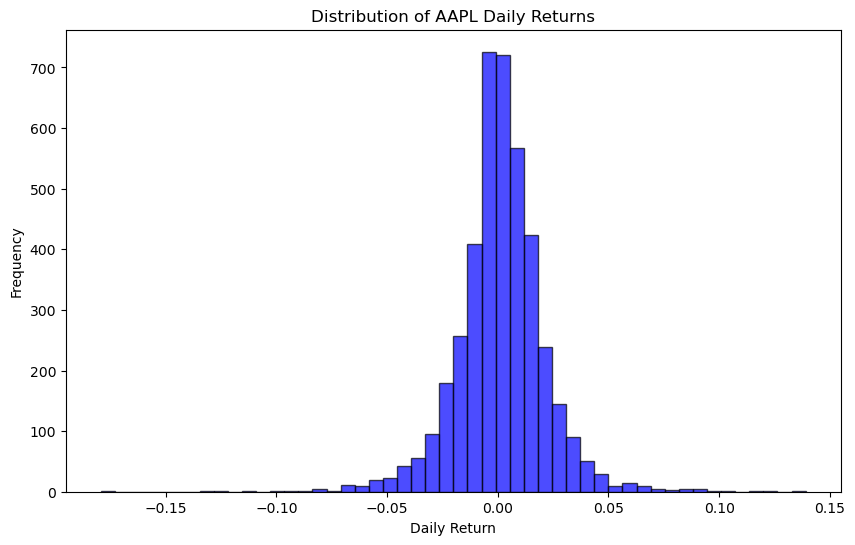

ShapiroResult(statistic=0.940666076855671, pvalue=6.180858977992611e-38)

In [8]:
# Calculate daily returns
aapl_data['daily_return'] = aapl_data['close'].pct_change()

# Drop NaN values resulting from the pct_change calculation
daily_returns = aapl_data['daily_return'].dropna()

# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(daily_returns, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of AAPL Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Perform the Shapiro-Wilk normality test
shapiro_test = stats.shapiro(daily_returns)

shapiro_test


The results of the Shapiro-Wilk normality test are:

- Statistic: 0.94
- p-value: 6.19e-38

Given the extremely small p-value, we reject the null hypothesis that the daily returns follow a normal distribution. This suggests that the returns are not normally distributed.

# <a id='toc5_'></a>[Conclusions](#toc0_)



- The time-series plot of AAPL's closing prices and traded volume over time showed considerable growth in AAPL's stock price, particularly after 2015, with sharp spikes in trading volume around periods of high price volatility.
- The candlestick chart showed substantial volatility in the price range.
- The summary statistics showed a mean closing price of $46.39 with a standard deviation of $50.29, indicating significant variability in prices over the years. Traded volume showed a similarly wide range, with a mean of 366 million and a standard deviation of 372 million.
- Moving average analysis revealed the price trends in both the short-term (50-day moving average) and long-term (200-day moving average). The 200-day moving average, in particular, helped identify long-term upward trends in AAPL's stock, while the 50-day moving average gave insight into short-term fluctuations.
- The t-test comparing the average closing prices in 2010 and 2020 resulted in a statistically significant difference. The p-value (1.93e-156) was extremely small, leading to the rejection of the null hypothesis, confirming that AAPL stock prices in 2020 were significantly higher than in 2010. This difference aligns with AAPL's tremendous growth, especially with technological product releases and market expansions.
- The distribution of daily returns showed a heavy-tailed shape, and the Shapiro-Wilk test for normality (p-value of 6.19e-38) confirmed that the returns are not normally distributed. 